In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from bitcoin.db import get_all_data
import numpy as np

df = get_all_data()


2018-03-19 10:07:17,361 root         INFO     Load data from SQL.


In [2]:
df[df.isnull().any(axis=1)]

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price


In [3]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price
count,1.855500e+04,18555.000000,18555.000000,18555.000000,18555.000000,18555.000000,18555.000000,1.855500e+04,18555.000000,18555.000000,18555.000000
mean,1.520843e+09,7409.265911,7415.682398,7412.720669,7412.569829,1.772204,0.060107,4.776231e+05,0.059756,0.025727,1127.707005
std,3.381992e+05,808.008411,807.432395,807.661645,807.670646,3.788005,0.078487,3.266015e+05,0.035578,0.068634,2466.706489
min,1.520272e+09,5930.000000,5970.960000,5955.390000,5955.390000,0.000673,-0.084993,2.743700e+04,-0.028105,-0.108224,0.000000
25%,1.520551e+09,6712.315000,6719.005000,6715.970000,6716.045000,0.150000,0.014490,2.268010e+05,0.031806,-0.031481,0.000000
50%,1.520830e+09,7379.960000,7382.840000,7380.020000,7380.010000,0.554951,0.043844,3.867390e+05,0.060676,0.026073,0.000000
75%,1.521120e+09,7809.130000,7814.685000,7810.545000,7810.510000,1.783465,0.079846,6.385605e+05,0.082017,0.066106,0.000000
max,1.521447e+09,9399.000000,9399.000000,9399.000000,9399.000000,90.488639,0.612404,1.987974e+06,0.173389,0.211511,7003.130000


In [4]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price
time,1.000000,-0.885339,-0.886422,-0.885951,-0.885919,-0.035332,-0.061289,-0.012150,-0.232393,-0.535893,0.681525
low,-0.885339,1.000000,0.999897,0.999936,0.999952,-0.032911,0.045732,0.166017,0.140995,0.604021,-0.531847
high,-0.886422,0.999897,1.000000,0.999952,0.999952,-0.022953,0.046788,0.165065,0.141380,0.604176,-0.532873
open,-0.885951,0.999936,0.999952,1.000000,0.999912,-0.026911,0.046301,0.165444,0.141060,0.604193,-0.532424
close,-0.885919,0.999952,0.999952,0.999912,1.000000,-0.027966,0.046203,0.165602,0.141275,0.604044,-0.532363
volume,-0.035332,-0.032911,-0.022953,-0.026911,-0.027966,1.000000,0.061344,-0.062303,-0.011683,-0.005231,-0.029080
tw_sentiment,-0.061289,0.045732,0.046788,0.046301,0.046203,0.061344,1.000000,-0.138156,-0.101760,-0.082428,-0.151715
tw_followers,-0.012150,0.166017,0.165065,0.165444,0.165602,-0.062303,-0.138156,1.000000,-0.157948,0.313082,0.222055
reddit_sentiment,-0.232393,0.140995,0.141380,0.141060,0.141275,-0.011683,-0.101760,-0.157948,1.000000,-0.148439,-0.388956
google_sentiment,-0.535893,0.604021,0.604176,0.604193,0.604044,-0.005231,-0.082428,0.313082,-0.148439,1.000000,-0.292332


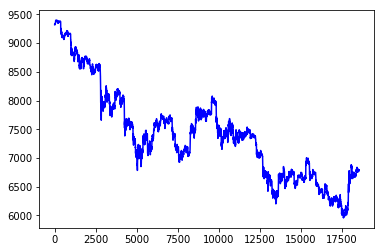

In [5]:
plt.plot(df['close'], 'b')

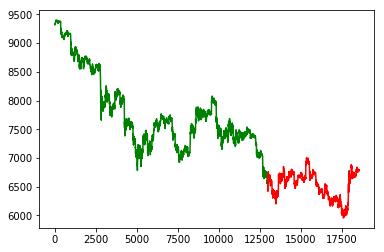

In [6]:
max = df['close'].count()
limit = int(0.3 * max)
plt.plot(df['close'][0:max - limit], 'g')
plt.plot(df['close'][-limit:], 'r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a08bd30>,
      dtype=object)

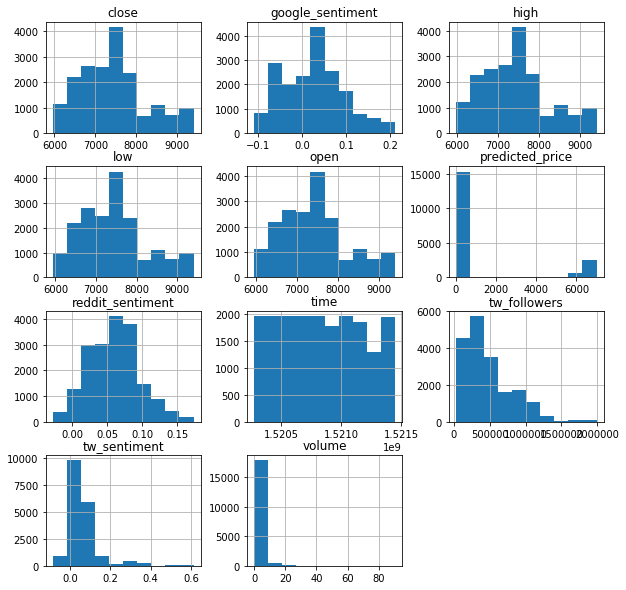

In [7]:
df.hist(figsize=(10,10))

In [8]:
from bitcoin.core import Core
core = Core()
history = core.train()

2018-03-19 10:07:19,753 root         INFO     ENV => test
2018-03-19 10:07:19,754 root         INFO     Train Model
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2018-03-19 10:07:20,728 root         INFO     Load data from SQL.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

Epoch 30/100
12988/12988 [==============================] - 1s 103us/step - loss: 42.7749 - mean_squared_error: 0.0264 - mean_absolute_error: 0.1315 - val_loss: 41.0176 - val_mean_squared_error: 0.1165 - val_mean_absolute_error: 0.2874
Epoch 31/100
12988/12988 [==============================] - 1s 106us/step - loss: 40.8551 - mean_squared_error: 0.0237 - mean_absolute_error: 0.1249 - val_loss: 39.1462 - val_mean_squared_error: 0.1144 - val_mean_absolute_error: 0.2887
Epoch 32/100
12988/12988 [==============================] - 1s 104us/step - loss: 38.9731 - mean_squared_error: 0.0201 - mean_absolute_error: 0.1156 - val_loss: 37.3883 - val_mean_squared_error: 0.1172 - val_mean_absolute_error: 0.2996
Epoch 33/100
12988/12988 [==============================] - 1s 97us/step - loss: 37.1944 - mean_squared_error: 0.0167 - mean_absolute_error: 0.1057 - val_loss: 35.6951 - val_mean_squared_error: 0.1224 - val_mean_absolute_error: 0.3141
Epoch 34/100
12988/12988 [==============================]

Epoch 65/100
12988/12988 [==============================] - 1s 92us/step - loss: 6.8407 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0263 - val_loss: 6.4517 - val_mean_squared_error: 3.6914e-04 - val_mean_absolute_error: 0.0154
Epoch 66/100
12988/12988 [==============================] - 1s 92us/step - loss: 6.4626 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0263 - val_loss: 6.0976 - val_mean_squared_error: 4.8887e-04 - val_mean_absolute_error: 0.0185
Epoch 67/100
12988/12988 [==============================] - 1s 91us/step - loss: 6.1056 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0264 - val_loss: 5.7557 - val_mean_squared_error: 5.3826e-04 - val_mean_absolute_error: 0.0197
Epoch 68/100
12988/12988 [==============================] - 1s 92us/step - loss: 5.7629 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0269 - val_loss: 5.4350 - val_mean_squared_error: 3.8756e-04 - val_mean_absolute_error: 0.0166
Epoch 69/100
12988/12988 [==========================

Epoch 100/100
12988/12988 [==============================] - 3s 206us/step - loss: 1.1699 - mean_squared_error: 9.3267e-04 - mean_absolute_error: 0.0212 - val_loss: 1.1279 - val_mean_squared_error: 6.3381e-04 - val_mean_absolute_error: 0.0222


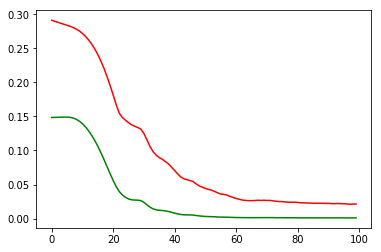

In [9]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

In [10]:
core.train_anomaly()

2018-03-19 10:09:49,360 root         INFO     Train Anomaly Model
2018-03-19 10:09:49,362 root         INFO     Load data from SQL.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   47.7s
[Parallel(n_jobs=10)]: Done 150 out of 150 | elapsed:  1.1min finished


KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [11]:
core.test_order_percent()

2018-03-19 10:10:57,041 root         INFO     Load data from SQL.
2018-03-19 10:11:19,765 root         INFO     Error Order percentage: 17.41%
2018-03-19 10:11:19,767 root         INFO     TEST From 2018-03-14 22:45:00 to 2018-03-19 09:07:00
2018-03-19 10:11:19,768 root         INFO     Number of api calls: 0.32 / min
2018-03-19 10:11:19,769 root         INFO     Number of anomalies: 633
2018-03-19 10:11:19,770 root         INFO     With prediction 1710.10 euros => 71.01% => 23.67% / day
2018-03-19 10:11:19,771 root         INFO     Without prediction 1036.79 euros => 3.68% => 1.23% / day
